# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Your code here
boston = pd.read_csv("/Users/timeisenmenger/Desktop/Ironhack /Week7/Week7-Lab4/lab-problems-with-ML/data/boston_data.csv")

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [49]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [50]:

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [51]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [52]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [53]:
from scipy import stats
boston = boston[(np.abs(stats.zscore(boston)) < 3).all(axis=1)]

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

/Users/timeisenmenger/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


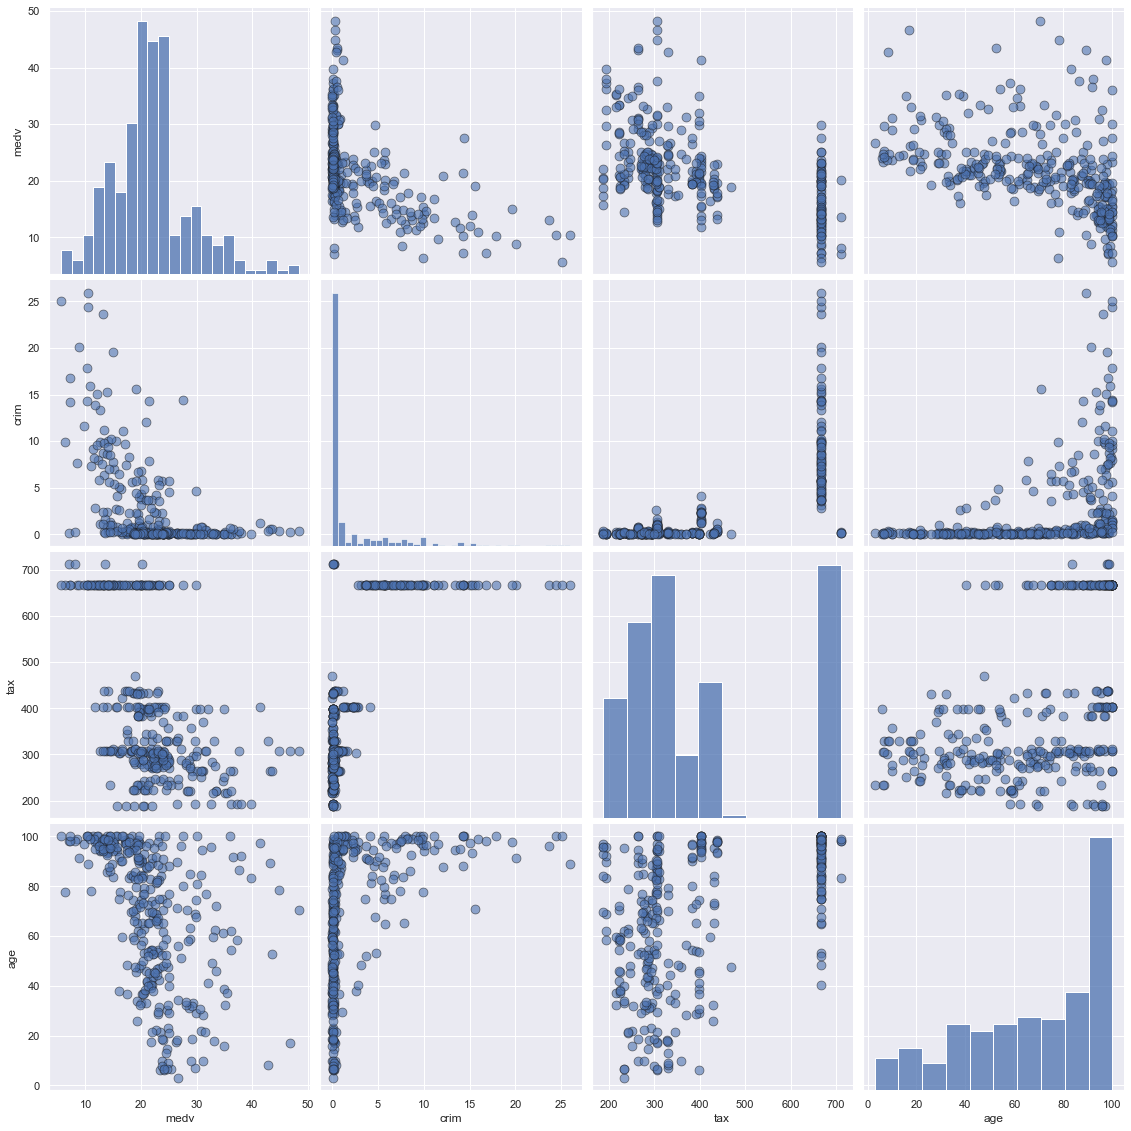

In [54]:
# Your code here
#variables: tax, crim, age
sns.pairplot(boston, vars = ["medv",'crim', 'tax', 'age'],  
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

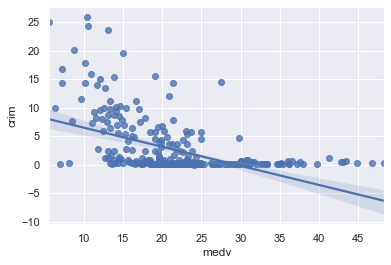

In [55]:
# Your response here
sns.regplot(x="medv",
            y="crim", 
            data=boston);

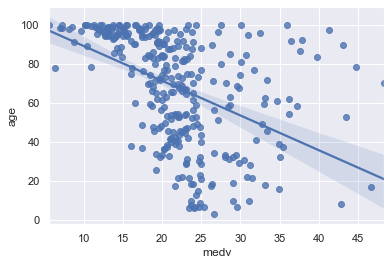

In [56]:
sns.regplot(x="medv",
            y="age", 
            data=boston);

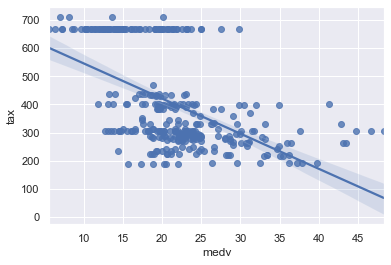

In [57]:
sns.regplot(x="medv",
            y="tax", 
            data=boston);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# Your response here
# Your response here
#criminality rate, quite constant relation, suprisingly, age still a lot of different values, and tax stronger negativ correlatioon

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

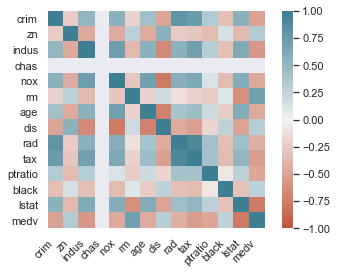

In [58]:
# Your code here
corr = boston.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [59]:
# Your code here
boston["medv"].describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [5]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true,y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [6]:
# Your code here
from sklearn.model_selection import train_test_split



In [7]:
y = boston["medv"]
X = boston.loc[:, boston.columns != "medv"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
max_depth = [2,4,6,8,10]

In [23]:
train_score = []
test_score = []

for depth in max_depth:
        model = RandomForestRegressor(max_depth= depth, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_score_train = r2_score(y_train, y_pred)
        train_score.append(r2_score_train)
        r2_score_test = r2_score(y_test, y_pred_test)
        test_score.append(r2_score_test)
        print("Depth: ", depth)
        print("Train Score: ", r2_score_train)
        print("Test Score: ", r2_score_test)

Depth:  2
Train Score:  0.7825758443913158
Test Score:  0.7455030721333717
Depth:  4
Train Score:  0.913983666467321
Test Score:  0.8332495418619758
Depth:  6
Train Score:  0.9538490073841634
Test Score:  0.8674523902907605
Depth:  8
Train Score:  0.9688424082577857
Test Score:  0.8713893504709245
Depth:  10
Train Score:  0.9732042138544669
Test Score:  0.8706190141953776


Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Your code here

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

/Users/timeisenmenger/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

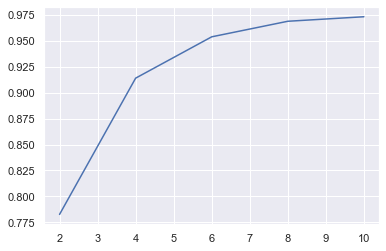

In [33]:
sns.lineplot(max_depth, train_score)

/Users/timeisenmenger/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

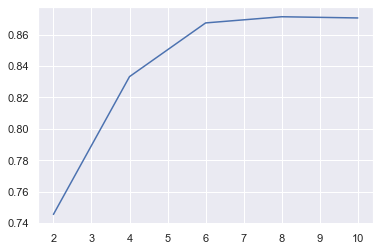

In [34]:
sns.lineplot(max_depth, test_score)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

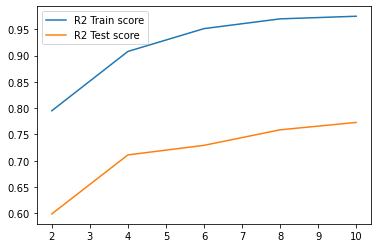

In [79]:
# Produce a plot with the score for the testing and training for the different max depths


In [ ]:
# Your response here


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [46]:
# Your code here
max_depth_2 = [1,10]
train_score_new = []
test_score_new = []



In [48]:
for depth in max_depth_2:
        model = RandomForestRegressor(max_depth = depth, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_score_train = r2_score(y_train, y_pred)
        train_score_new.append(r2_score_train)
        r2_score_test = r2_score(y_test, y_pred_test)
        test_score_new.append(r2_score_test)
        print("Depth: ", depth)
        print("Train Score: ", r2_score_train)
        print("Test Score: ", r2_score_test)

Depth:  1
Train Score:  0.592014205468021
Test Score:  0.5710979601840706
Depth:  10
Train Score:  0.9732042138544669
Test Score:  0.8706190141953776


In [ ]:
# Your response here


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
#not so relevant as it is quite old
#no a home has way more things to consider
#I would say so
#no huge differencens, can not apply this to all cities